# Extra Practice for Machine Learning
For this you will be working with the `cars` dataset from `vega_datasets`. You may have seen them before, but if not, they are described below.

In [1]:
import pandas as pd

cars = pd.read_csv('cars.csv')

The `cars` dataset is a dataset with a bunch of different models of car, with several different statistics about each of them, including their horsepower, acceleration, etc., the year they were released, and their country of origin. Here's what it looks like:

In [2]:
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## ML with Quantitative Data

Create and train a model that, given the `cars` dataset, will predict the Horsepower of a car. Think about the type of data you are trying to predict - what model (of the ones we have already seen) should you use to predict quantitative data? Make sure to split training and testing data, and check the mean squared error of your model.

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Enter the rest of your solution here!
cars = cars.dropna() 

X = cars.loc[:, cars.columns != "Horsepower"]
y = cars["Horsepower"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = mean_squared_error(y_test, predictions)
print(score)

134.64556962025316


Bonus: How does accuracy or mean squared error change with the split between training and testing data? Do at least three different splits with this data to see. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = mean_squared_error(y_test, predictions)
print(score)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = mean_squared_error(y_test, predictions)
print(score)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = mean_squared_error(y_test, predictions)
print(score)

163.55
256.7579617834395
117.22881355932203


More Bonus: Testing hyperparameters. What maximum depth has the greatest accuracy in our testing set. If we want to do this without making decision off our our training dataset, we need to split our data into three categories: train, test, and development. Then we can compare our changes in how it affects the development dataset and not the training dataset so we can do a final evaluation at the end with our final model. 

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.3)

best_depth = 0
best_mse = 0.0

for depth in range(1, 11):
    model = DecisionTreeRegressor(max_depth = depth, random_state=42)
    model.fit(X_train, y_train)
    
    preds_dev = model.predict(X_dev)
    score = mean_squared_error(y_dev, preds_dev)

    if score > best_mse:
        best_mse = score
        best_depth = depth

print("Best depth is " + str(best_depth) + " with score of " + str(best_mse))

model = DecisionTreeRegressor(max_depth = best_depth, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = mean_squared_error(y_test, predictions)
print("our score with the best depth is ", score)

Best depth is 1 with score of 413.8351446342814
our score with the best depth is  433.06462102737413


## ML with Categorical Data

Create, train, and test a model that will predict the country of origin for the `cars` dataset. Remember, this is categorical data, so you will need to use a different type of model (of the ones we have already seen) than you did for the `Horsepower` model.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

cars = cars.dropna()

X = cars.loc[:, cars.columns != "Origin"]
y = cars["Origin"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print(score)

0.7974683544303798


Bonus: How does accuracy or mean squared error change with the split between training and testing data? Do at least three different splits with this data to see. 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("if only 10% of data was split:", score)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("if 50% of data was split:", score)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("if only 30% of data was split:", score)

if only 10% of data was split: 0.8
if 50% of data was split: 0.8214285714285714
if only 30% of data was split: 0.847457627118644


More Bonus: Testing hyperparameters. What maximum depth (or other hyperparameter) has the greatest accuracy in our testing set? If we want to do this without making decision off our our training dataset, we need to split our data into three categories: train, test, and development. Then we can compare our changes in how it affects the development dataset and not the training dataset so we can do a final evaluation at the end with our final model. 

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size = 0.5)

best_depth = 0
best_score = 0.0

for depth in range(1, 30):
    model = DecisionTreeClassifier(max_depth = depth, random_state=42)
    model.fit(X_train, y_train)
    
    preds_dev = model.predict(X_dev)
    score = accuracy_score(y_dev, preds_dev)

    if score > best_score:
        best_score = score
        best_depth = depth

print("Best depth is " + str(best_depth) + " with score of " + str(best_score))

model = DecisionTreeClassifier(max_depth = best_depth, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

score = accuracy_score(y_test, predictions)
print("our score with the best depth is", score)

Best depth is 9 with score of 0.8974358974358975
our score with the best depth is 0.65


Predict Miles_per_Gallon

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

cars = cars.dropna()

X = cars.loc[:, cars.columns != "Miles_per_Gallon"]
y = cars["Miles_per_Gallon"]

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)

print(mse)

23.96620253164557


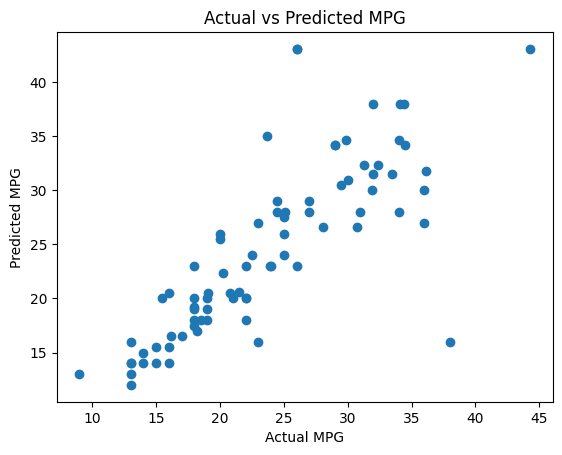

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()

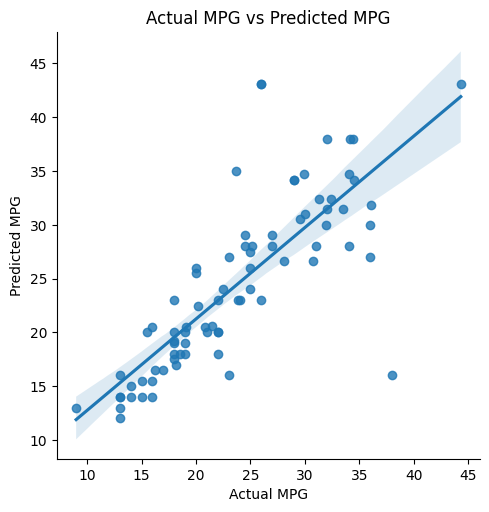

In [11]:
import seaborn as sns

results = pd.DataFrame({
    "Actual MPG": y_test,
    "Predicted MPG": pred
})
plot = sns.lmplot(results, x = "Actual MPG", y = "Predicted MPG")
plot.set(title = "Actual MPG vs Predicted MPG")

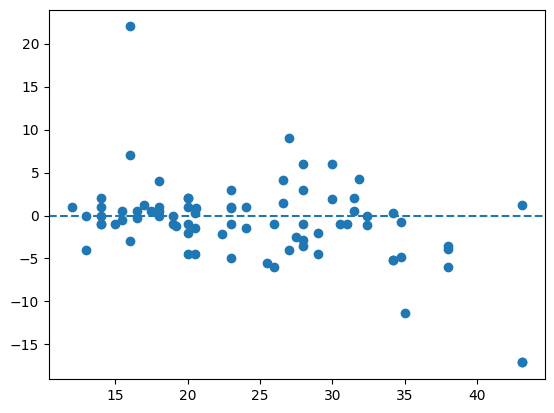

In [12]:
residuals = y_test - pred

plt.scatter(pred, residuals)
plt.axhline(0, linestyle='--')

0.9113924050632911


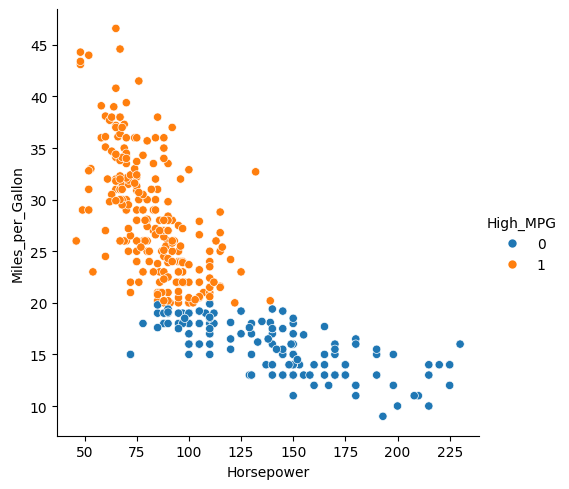

In [19]:
cars = cars.dropna()

cars["High_MPG"] = (cars["Miles_per_Gallon"] >= 20).astype(int)

X = cars.drop(columns = ["High_MPG", "Miles_per_Gallon"])
y = cars["High_MPG"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(y_test, pred)

print(acc)


sns.relplot(cars, x = "Horsepower", y= "Miles_per_Gallon", kind = "scatter", hue = "High_MPG")

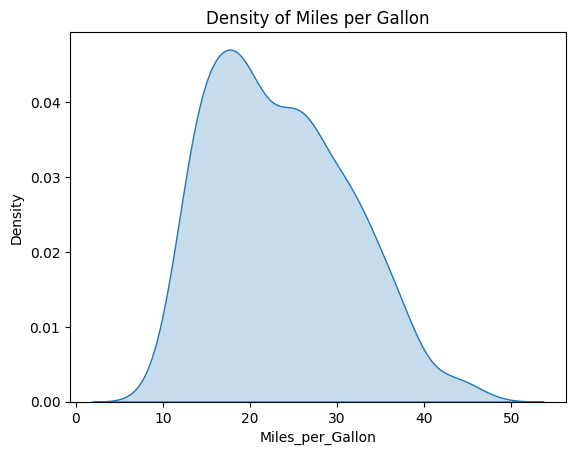

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=cars, x="Miles_per_Gallon", fill=True)
plt.title("Density of Miles per Gallon")
plt.show()